In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans 

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.shape

(200, 4)

In [4]:
df.head()

,CustomerID,Genre,Age,Spending Score (1-100)
0,1,Male,19,39
1,2,Male,21,81
2,3,Female,20,6
3,4,Female,23,77
4,5,Female,31,40


In [5]:
df.describe()

,CustomerID,Age,Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,100.500000,38.850000,50.200000
std,57.879185,13.969007,25.823522
min,1.000000,18.000000,1.000000
25%,50.750000,28.750000,34.750000
50%,100.500000,36.000000,50.000000
75%,150.250000,49.000000,73.000000
max,200.000000,70.000000,99.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
X = df.copy()

In [9]:
X = df.drop(columns='CustomerID')

In [10]:
X.head()

,Genre,Age,Spending Score (1-100)
0,Male,19,39
1,Male,21,81
2,Female,20,6
3,Female,23,77
4,Female,31,40


Feature Engineering

In [18]:
def age_category(Age):
    if Age >= 18 and Age < 35:
        return 'Young'
    if Age >=35 and Age < 55:
        return 'Middle Aged'
    else:
        return 'Old'

In [21]:
X = df['Age'].apply(age_category)

Encoding

In [11]:
X['Genre'] = X['Genre'].map({'Male':0, 'Female':1})

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Choosing optimal k using Elbow Method

In [13]:
n_cluster = range(1,25)
wcss = []
for i in n_cluster:
    model = KMeans(n_clusters=i)
    model.fit(X_scaled)
    wcss.append(model.inertia_)

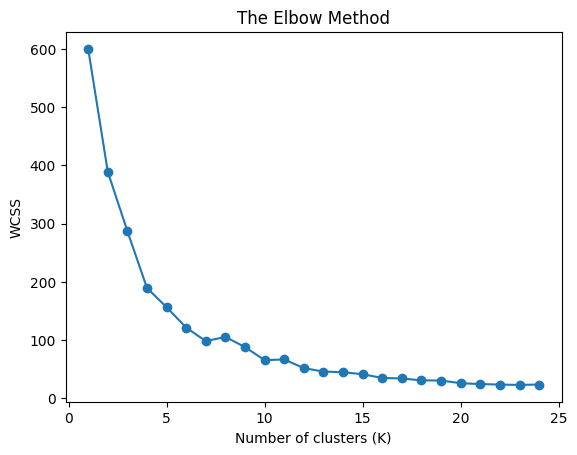

In [14]:
plt.plot(n_cluster, wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [16]:
final=KMeans(n_clusters=8)
final.fit(X_scaled)

KMeans()

In [ ]:
X_scaled.shape

(200, 3)

In [ ]:
df['cluster'] = final.labels_